
##  Caso de estudio 2.
## Sistema de tres variables de estado
<p style="text-align:left">
   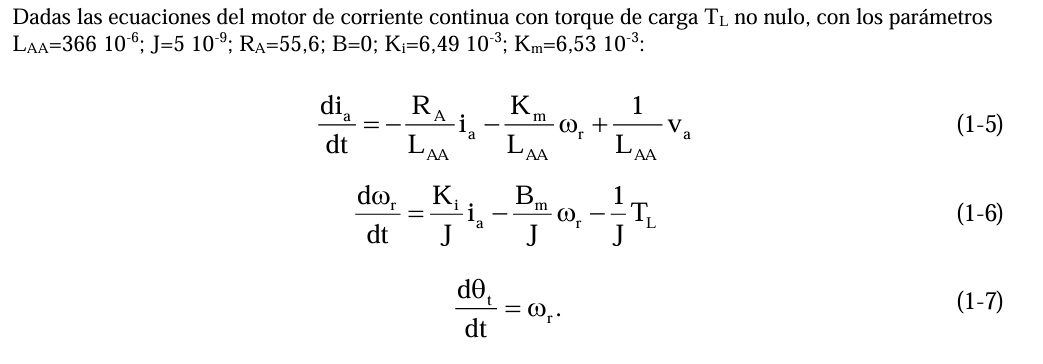
</p>


In [1]:
clear all; clc; close all;
%Datos proporcionados
Laa=366e-6

Laa = 3.6600e-04

In [2]:
J=5e-9

J = 5.0000e-09

In [3]:
Ra=55.6

Ra = 55.6000

In [4]:
B=0

B = 0

In [5]:
Ki=6.49e-3

Ki = 0.0065

In [6]:
Km=6.53e-3

Km = 0.0065

In [7]:
Va=12

Va = 12

In [8]:
TL=0

TL = 0

## Modelado de motor en espacios de estados

In [9]:
%Variables de estados elegidas
%x1=ia
%x2=wr
%x3=tita
%Matrices

% xp=Ax+Bu

A=[-Ra/Laa -Km/Laa 0 ; Ki/J -B/J 0 ; 0 1 0] %Matriz de estado

A = 3x3
1.0e+06 *
   -0.1519   -0.0000         0
1.2980         0         0
         0    0.0000         0

In [10]:
B=[1/Laa 0; 0 -1/J ; 0 0] %Matriz de entrada

B = 3x2
1.0e+08 *
    0.0000         0
         0   -2.0000
         0         0

In [11]:

%y=Cx ecuación de salida

C=[0 1 0] %matriz de salida

C = 1x3
     0     1     0

In [12]:
D=[0] %Matriz de transmisión directa

D = 0

In [13]:

%Condiciones iniciales

       i_a(1)=0

i_a = 0

In [14]:
       w_r(1)=0

w_r = 0

In [15]:
       tita_r(1)=0

tita_r = 0

In [16]:
       y(1)=0

y = 0

In [17]:
       Xop= [0 0 0]'

Xop = 3x1
     0
     0
     0

In [18]:
       x=[i_a(1)  w_r(1)  tita_r(1)]'

x = 3x1
     0
     0
     0

In [19]:

%Tiempos de integración, simulación y puntos
    DeltaT= 10e-7  %dato del profe

DeltaT = 1.0000e-06

In [20]:
    t_Sim= 5;
    N= t_Sim/DeltaT %cantidad de puntos

N = 5000000

In [21]:

%arreglo de tiempo
    t=0:DeltaT:t_Sim

t = 1x5000001
         0    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000

In [22]:

%Señal de entrada
u=[Va TL]'

u = 2x1
    12
     0


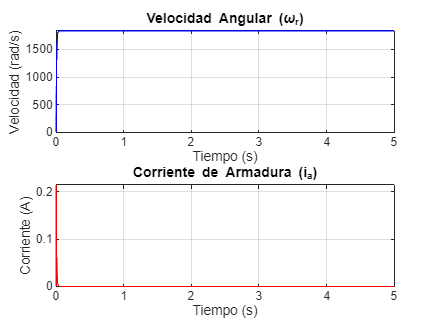

In [23]:
%Euler
for i=1:(length(t)-1)
    %Variables de estado del sistema lineal
    xp=A*(x-Xop)+B*u;
    x=x+xp*DeltaT;
    Y=C*x;
    y(i+1)=Y(1);
    i_a(i+1)=x(1);
    w_r(i+1)=x(2);
    tita_r(i+1)=x(3);
end

% --- Graficar Velocidad Angular y Corriente ---
figure('Name', 'Resultados de Simulación Motor CC (Espacio de Estados)');

subplot(2, 1, 1); % Gráfico superior
plot(t, w_r, 'b-'); % omega_r_hist es un vector fila, time es columna, plot funciona bien
title('Velocidad Angular (\omega_r)');
xlabel('Tiempo (s)');
ylabel('Velocidad (rad/s)');
grid on;
axis tight;

subplot(2, 1, 2); % Gráfico inferior
plot(t, i_a, 'r-');
title('Corriente de Armadura (i_a)');
xlabel('Tiempo (s)');
ylabel('Corriente (A)');
grid on;
axis tight;

In [24]:

% --- Encontrar Valores Máximos (para Item 4) ---
max_w_r = max(w_r);
max_ia = max(i_a);

fprintf('\n--- Valores Máximos Alcanzados ---\n');

--- Valores Máximos Alcanzados ---

In [25]:
fprintf('Velocidad angular máxima): %.4f rad/s\n', max_w_r);

Velocidad angular máxima): 1837.6723 rad/s

In [26]:
fprintf('Corriente máxima (i_{a,max}): %.4f A\n', max_ia);

Corriente máxima (i_{a,max}): 0.2147 A

In [27]:

% --- Calcular Torque Máximo Desarrollado ---
max_torque = Ki * max_ia;
fprintf('Torque máximo desarrollado por el motor:  %.6f N·m\n', max_torque);

Torque máximo desarrollado por el motor:  0.001393 N·m




Ya teniendo el valor máximo de Torque , hacemos la verificación del comportamiento de $i_a \;y\;w_r$


In [28]:
%Condiciones iniciales

       i_aa(1)=0;

i_aa = 0

In [29]:
       w_rr(1)=0;

w_rr = 0

In [30]:
       tita_rr(1)=0;

tita_rr = 0

In [31]:
       yy(1)=0;

yy = 0

In [32]:
       Xopp= [0 0 0]';

Xopp = 3x1
     0
     0
     0

In [33]:
       xx=[i_a(1)  w_r(1)  tita_r(1)]';

xx = 3x1
     0
     0
     0


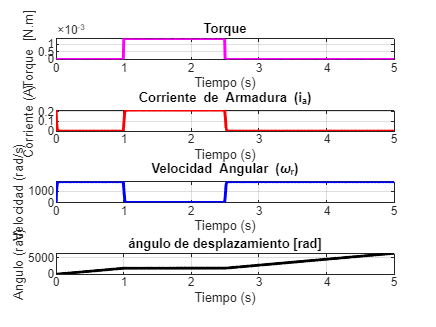

In [34]:
Uvin=Va*ones(1,length(t));
TorqL= zeros(1, length(t));
%Genera la perturbación en un determinado tiempo
for ii=1:length(t)
    mov=t(ii);
    if (mov>=1 && mov<=2.5)
        TorqL(ii)=max_torque;
    else
        TorqL(ii)= 0;
    end
end

%Euler
for e=1:(length(t)-1)
    xpp=A*(xx - Xopp)+B*[Uvin(e) TorqL(e)]';
    xx=xx+xpp*DeltaT;
    i_aa(e+1)=xx(1);
    w_rr(e+1)=xx(2);
    tita_rr(e+1)=xx(3);
end

%Gráficas
%va,ia,wr,tita,torque

figure('Name','Resultados de Simulación con Torque');

subplot(4, 1, 1); %
plot(t, TorqL, 'm-','LineWidth',2);
title('Torque');
xlabel('Tiempo (s)');
ylabel('Torque  [N.m]');
grid on;
axis tight;

subplot(4, 1, 2);
plot(t, i_aa, 'r-','LineWidth',2);
title('Corriente de Armadura (i_a)');
xlabel('Tiempo (s)');
ylabel('Corriente (A)');
grid on;
axis tight;

subplot(4, 1, 3); %
plot(t, w_rr, 'b-','LineWidth',2);
title('Velocidad Angular (\omega_r)');
xlabel('Tiempo (s)');
ylabel('Velocidad (rad/s)');
grid on;
axis tight;

subplot(4, 1, 4);
plot(t, tita_rr, 'k-','LineWidth',2);
title('ángulo de desplazamiento [rad]');
xlabel('Tiempo (s)');
ylabel('Angulo (rad)');
grid on;
axis tight;



!!!EndOutputRegion!!!